<a href="https://colab.research.google.com/github/ankurmcw/machine_learning_note_books/blob/master/Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

In [1]:
#@title Download Dataset
!wget -qq xxx
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning ,WOE
%matplotlib inline

### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('GiveMeSomeCredit.csv')
print(df.shape)
df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Pre-processing

#### Remove unwanted columns

In [ ]:
# YOUR CODE HERE
df.drop(df.columns[df.columns.str.contains('unnamed', case= False)], axis=1, inplace= True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
# YOUR CODE HERE
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
df['MonthlyIncome']= df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['NumberOfDependents']= df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean())
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### EDA &  Visualization

#### Calculate the percentage of the target lebels and visualize with a graph

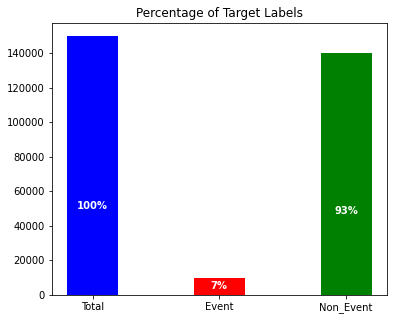

In [ ]:
#@title
# YOUR CODE HERE
total_target= df['SeriousDlqin2yrs'].count()
total_event = df[df['SeriousDlqin2yrs']==1]['SeriousDlqin2yrs'].count()
total_non_event = df[df['SeriousDlqin2yrs']==0]['SeriousDlqin2yrs'].count()
event_percent = round((total_event / total_target)*100)
non_event_percent = round((total_non_event / total_target)*100)

plx = np.array(['Total', 'Event', 'Non_Event'])
ply = np.array([total_target, total_event, total_non_event  ])
plz = np.array([100, event_percent, non_event_percent])

fig = plt.figure( figsize = (6,5))
graph = plt.bar( plx, ply, color = ['Blue', 'Red','Green'], width = 0.4 )
plt.title('Percentage of Target Labels')
#print (plt.title)
i= 0
for p in graph:
  width= p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, height/3, str(plz[i])+'%', ha='center', color='White', weight = 'bold')
  i+=1
plt.show()
#plot_data.head()

#### Plot the distribution of SeriousDlqin2yrs by age

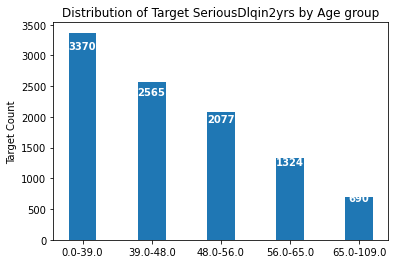

In [ ]:
# YOUR CODE HERE
agebin = ['1','2','3','4','5']
df['agegroup'], bins = pd.qcut(df['age'], [0,0.2,0.4,0.6,0.8,1], labels=agebin, retbins=True)

df_binned= df.groupby("agegroup").agg({'SeriousDlqin2yrs': 'sum'}).reset_index()
binlabel=[]
i=0
while (i+1<len(bins)):
  binlabel.append( str(bins[i]) + '-' + str(bins[i+1]))
  i+=1

df_binned['agelabel']= binlabel

graph= plt.bar(df_binned['agelabel'],  df_binned['SeriousDlqin2yrs'], width=0.4)

i= 0
for p in graph:
  width= p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, height*0.92, df_binned['SeriousDlqin2yrs'].values[i], ha='center', color='White', weight = 'bold')
  i+=1

plt.title("Distribution of Target SeriousDlqin2yrs by Age group")
plt.xticks(binlabel, label ='Agegroup')
plt.ylabel( "Target Count")
plt.show()


#### Calculate the correlation and plot the heatmap

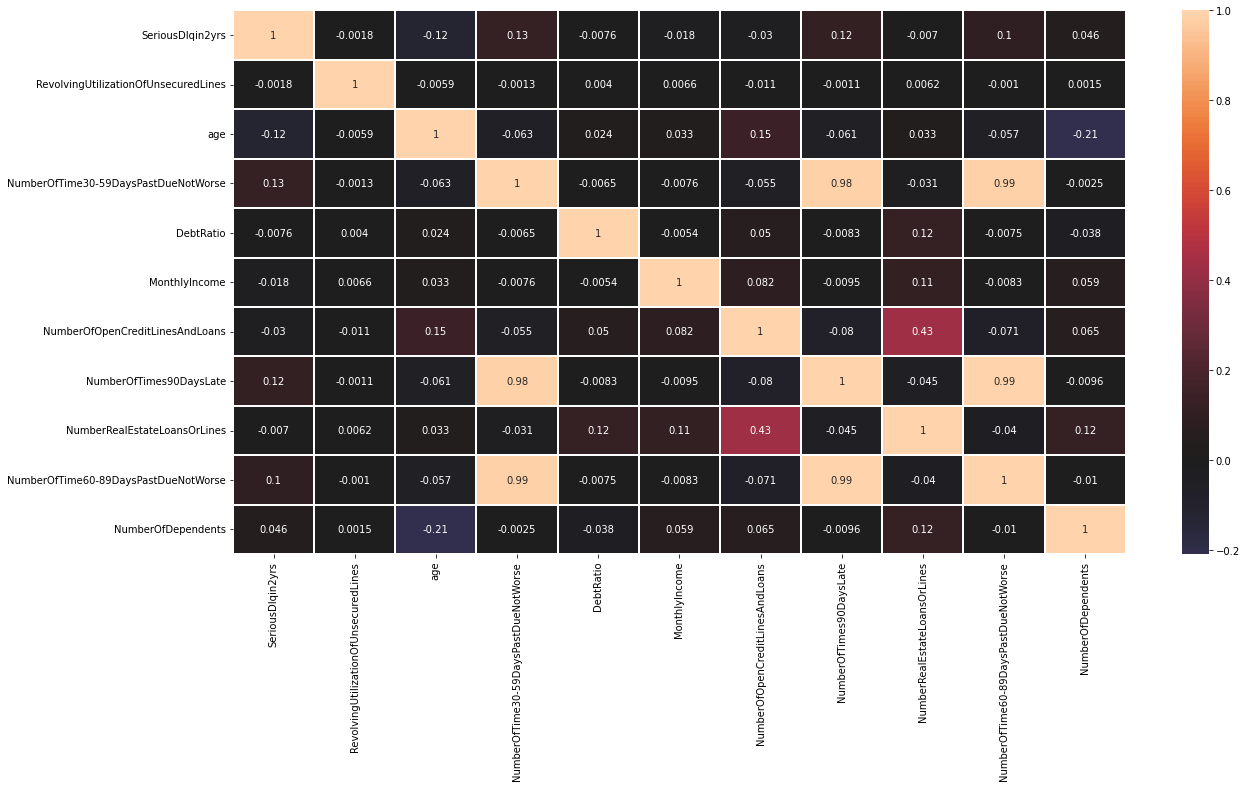

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=1, center=0)
plt.show()

### Reference code

In [ ]:
#@title
df_event = df[df['SeriousDlqin2yrs']==1]
df_non_event = df[df['SeriousDlqin2yrs']==0]
eventcnt= df_event.groupby("agegroup").agg({'SeriousDlqin2yrs': 'count'})
non_eventcnt=df_non_event.groupby("agegroup").agg({'SeriousDlqin2yrs': 'count'})
df_binned['event'] = eventcnt.values
df_binned['non_event'] = non_eventcnt.values
#print ( len(eventcnt), len(non_eventcnt),len(df_binned))
df_binned['percentage of event'] = df_binned['event']/df_binned['event'].sum()
df_binned['percentage of Non_event'] = df_binned['non_event']/df_binned['non_event'].sum()
df_binned['WOE'] = np.log(df_binned['percentage of Non_event']/df_binned['percentage of event'])
df_binned['IV'] = (df_binned['percentage of Non_event']- df_binned['percentage of event'])* df_binned['WOE']
df_binned

,agegroup,SeriousDlqin2yrs,agelabel,event,non_event,percentage of event,percentage of Non_event,WOE,IV
0,1,3370,0.0-39.0,3370,28634,0.336126,0.204567,-0.496593,0.065332
1,2,2565,39.0-48.0,2565,27975,0.255835,0.199859,-0.246922,0.013822
2,3,2077,48.0-56.0,2077,26963,0.207161,0.192629,-0.072734,0.001057
3,4,1324,56.0-65.0,1324,28493,0.132057,0.203559,0.432726,0.030941
4,5,690,65.0-109.0,690,27909,0.068821,0.199387,1.063738,0.138888


### Data Engineering

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

### Monotonic Binning

In [ ]:
from xverse.transformer import MonotonicBinning
df= df.drop ( 'agegroup', axis=1)
X= df.drop ( 'SeriousDlqin2yrs', axis=1)

y= df['SeriousDlqin2yrs']
df.head()
clf = MonotonicBinning()
clf.fit(X,y)

print(clf.bins)
output_bins = clf.bins #will be used later in this exercise

{'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


In [ ]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,"(0.38, 50708.0]","(-0.001, 45.0]","(1.0, 98.0]","(0.57, 329664.0]","(6670.221, 3008750.0]","(10.0, 58.0]","(-0.001, 1.0]","(1.0, 54.0]","(-0.001, 1.0]","(1.0, 20.0]"
1,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
2,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
3,"(0.0544, 0.38]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
4,"(0.38, 50708.0]","(45.0, 59.0]","(-0.001, 1.0]","(-0.001, 0.238]","(6670.221, 3008750.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"


### Weight of Evidence

In [ ]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)
#clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well.
clf.iv_df #information value dataset

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
9,age,0.219843
1,MonthlyIncome,0.065725
2,NumberOfDependents,0.023730
3,NumberOfOpenCreditLinesAndLoans,0.023300
0,DebtRatio,0.012360
7,NumberRealEstateLoansOrLines,0.001605


In [ ]:
clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well.

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0544]",50000,877,49123,0.017540,0.982460,0.087473,0.350944,-1.389301,0.935429
1,RevolvingUtilizationOfUnsecuredLines,"(0.0544, 0.38]",50000,1556,48444,0.031120,0.968880,0.155196,0.346093,-0.802015,0.935429
2,RevolvingUtilizationOfUnsecuredLines,"(0.38, 50708.0]",50000,7593,42407,0.151860,0.848140,0.757331,0.302963,0.916188,0.935429
3,age,"(-0.001, 45.0]",51305,5019,46286,0.097827,0.902173,0.500598,0.330676,0.414666,0.219843
4,age,"(45.0, 59.0]",50377,3507,46870,0.069615,0.930385,0.349791,0.334848,0.043658,0.219843
5,age,"(59.0, 109.0]",48318,1500,46818,0.031044,0.968956,0.149611,0.334476,-0.804528,0.219843
6,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",142051,7450,134601,0.052446,0.947554,0.743068,0.961614,-0.257826,0.471831
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",7949,2576,5373,0.324066,0.675934,0.256932,0.038386,1.901126,0.471831
8,DebtRatio,"(-0.001, 0.238]",50000,3019,46981,0.060380,0.939620,0.301117,0.335641,-0.108543,0.012360
9,DebtRatio,"(0.238, 0.57]",50000,3177,46823,0.063540,0.936460,0.316876,0.334512,-0.054162,0.012360


In [ ]:
# YOUR CODE HERE
predictiveness = ['Not useful','Weak','Medium','Strong','Suspicious']

clf.iv_df['Predictiveness'] = pd.cut(clf.iv_df['Information_Value'], [0,0.02,0.1,0.3,0.5,1], labels=predictiveness, retbins=False)
clf.iv_df

,Variable_Name,Information_Value,Predictiveness
8,RevolvingUtilizationOfUnsecuredLines,0.935429,Suspicious
6,NumberOfTimes90DaysLate,0.484202,Strong
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831,Strong
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824,Medium
9,age,0.219843,Medium
1,MonthlyIncome,0.065725,Weak
2,NumberOfDependents,0.023730,Weak
3,NumberOfOpenCreditLinesAndLoans,0.023300,Weak
0,DebtRatio,0.012360,Not useful
7,NumberRealEstateLoansOrLines,0.001605,Not useful


### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE
feature_required = clf.iv_df[(clf.iv_df['Information_Value'] > 0.02) & (clf.iv_df['Information_Value'] <= 0.5) ]['Variable_Name'].values
feature_required
X= df[ feature_required]
y= df['SeriousDlqin2yrs'].values
print(X.shape, y.shape)
X.head(5)

(150000, 7) (150000,)


,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,age,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
0,0,2,0,45,9120.0,2.0,13
1,0,0,0,40,2600.0,1.0,4
2,1,1,0,38,3042.0,0.0,2
3,0,0,0,30,3300.0,0.0,5
4,0,1,0,49,63588.0,0.0,7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### Logistic Regression from scratch using gradient method

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](
https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

In [ ]:
# YOUR CODE HERE
class CustomLogisticRegression:
    def __init__(self, x, y):
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y

    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))

    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]


    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)

            loss = self.loss(sigma, self.y)

            dW = self.gradient_descent(self.x, sigma, self.y)

            #Updating the weights
            self.weight -= lr * dW

        return print('fitted successfully to data')

    #Method to predict the class label.
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True:
                y_pred[i] = 1
            else:
                continue

        return y_pred

In [ ]:
#creating the class Object
x = X
regressor = CustomLogisticRegression(x, y)

regressor.fit(0.1, 50)

y_pred = regressor.predict(x, 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


fitted successfully to data


In [ ]:
print('accuracy -> {}'.format(np.sum(y_pred == y) / y.shape[0]))

accuracy -> 0.93314


In [ ]:
precision_score(y, y_pred)

0.2857142857142857

### Implement the Logistic regression using sklearn
As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# With weightage
# YOUR CODE HERE
lr_weighted = LogisticRegression(random_state = 0, class_weight={0:0.07, 1:0.93})
lr_weighted.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.07, 1: 0.93}, random_state=0)

In [ ]:
# Without weightage
# YOUR CODE HERE
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Credit scoring

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [ ]:
# YOUR CODE HERE
print(lr_weighted.coef_)
print(lr_weighted.intercept_)

[[ 1.98636931  2.2169179  -0.1322722  -0.44355545 -0.29896003  0.08853472
   0.02575984]]
[-0.23721114]


In [ ]:
df_woe= clf.woe_df[clf.woe_df['Variable_Name'].isin( feature_required)]
df_woe= df_woe[['Variable_Name', 'Category', 'WOE']]
df_woe.rename(columns= {'Variable_Name': 'features', 'Category':'bin', 'WOE':'woe'}, inplace=True )
df_woe

,features,bin,woe
3,age,"(-0.001, 45.0]",0.414666
4,age,"(45.0, 59.0]",0.043658
5,age,"(59.0, 109.0]",-0.804528
6,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",-0.257826
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",1.901126
11,MonthlyIncome,"(-0.001, 4700.0]",0.300624
12,MonthlyIncome,"(4700.0, 6670.221]",-0.081528
13,MonthlyIncome,"(6670.221, 3008750.0]",-0.336321
14,NumberOfOpenCreditLinesAndLoans,"(-0.001, 6.0]",0.161831
15,NumberOfOpenCreditLinesAndLoans,"(6.0, 10.0]",-0.200293


In [ ]:
def generate_scorecard(model_coef,binning_df,features,B, n, alpha, offset):

    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(((-coef[i]*row['woe']+(alpha/n))*B)+ (offset/n)))])
    data = pd.DataFrame(lst, columns=cols)
    return data

score_card = generate_scorecard(lr_weighted.coef_,df_woe,feature_required,factor, len(feature_required),lr_weighted.intercept_[0], offset)
score_card

,Variable,Binning,Score
0,NumberOfTimes90DaysLate,"(-0.001, 1.0]",79
1,NumberOfTimes90DaysLate,"(1.0, 98.0]",-94
2,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",85
3,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",-53
4,NumberOfTime60-89DaysPastDueNotWorse,"(-0.001, 1.0]",68
5,NumberOfTime60-89DaysPastDueNotWorse,"(1.0, 98.0]",79
6,age,"(-0.001, 45.0]",74
7,age,"(45.0, 59.0]",69
8,age,"(59.0, 109.0]",58
9,MonthlyIncome,"(-0.001, 4700.0]",71


### Performance Metrics

In [ ]:
y_pred_w = lr_weighted.predict(X_test) # for weighted model
y_pred = lr.predict(X_test) # for model without weightage
print(np.concatenate((y_pred.reshape(len(y_pred_w),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Precision

In [ ]:
# YOUR CODE HERE
print(f'weighted: {precision_score(y_test, y_pred_w)}')
print(f'without weight: {precision_score(y_test, y_pred)}')

weighted: 0.17741370247065008
without weight: 0.5975103734439834


#### Recall

In [ ]:
# YOUR CODE HERE
print(f'weighted: {recall_score(y_test, y_pred_w)}')
print(f'normal: {recall_score(y_test, y_pred)}')

weighted: 0.6101235311840916
normal: 0.0433865622175354


#### Classification Report

In [ ]:
# YOUR CODE HERE
print(f'Weighted: {classification_report(y_test, y_pred_w)}')

Weighted:               precision    recall  f1-score   support

           0       0.97      0.80      0.87     46181
           1       0.18      0.61      0.27      3319

    accuracy                           0.78     49500
   macro avg       0.57      0.70      0.57     49500
weighted avg       0.91      0.78      0.83     49500



In [ ]:
print(f'Without weight: {classification_report(y_test, y_pred)}')

Without weight:               precision    recall  f1-score   support

           0       0.94      1.00      0.97     46181
           1       0.60      0.04      0.08      3319

    accuracy                           0.93     49500
   macro avg       0.77      0.52      0.52     49500
weighted avg       0.91      0.93      0.91     49500



#### Accuracy Score

In [ ]:
print(f'weighted: {accuracy_score(y_test, y_pred_w)}')

weighted: 0.7841818181818182


In [ ]:
print(f'without weight: {accuracy_score(y_test, y_pred)}')

without weight: 0.9338989898989899


#### Confusion Matrix

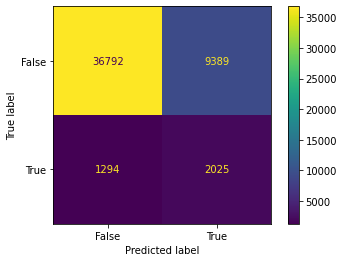

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_w)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

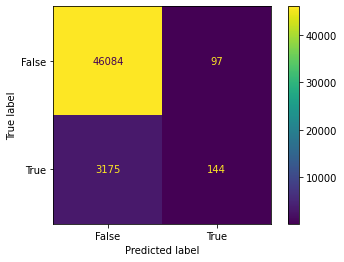

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations